Exploratory Data Analysis


In [10]:
!py -m pip install pandas
!py -m pip install numpy
!py -m pip install matplotlib
!py -m pip install spacy

'py' is not recognized as an internal or external command,
operable program or batch file.
'py' is not recognized as an internal or external command,
operable program or batch file.
'py' is not recognized as an internal or external command,
operable program or batch file.
'py' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import random
import re
import spacy
import numpy as np
import matplotlib.pyplot as plt
nlp = spacy.cli.download('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
df = pd.read_csv("spam_Emails_data.csv")
df

,label,text
0,Spam,viiiiiiagraaaa\r\nonly for the ones that want ...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
...,...,...
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...


In [3]:
df.nunique()

label         2
text     193848
dtype: int64

In [4]:
df = df.drop_duplicates('text')
df

,label,text
0,Spam,viiiiiiagraaaa\r\nonly for the ones that want ...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
...,...,...
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...


In [5]:
df.isnull().any()

label    False
text      True
dtype: bool

In [6]:
df = df.dropna()
df


,label,text
0,Spam,viiiiiiagraaaa\r\nonly for the ones that want ...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
...,...,...
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...


In [7]:
random.seed(10)

rand_idx = set()
while len(rand_idx) < 70000:
    rand_idx.add(random.randint(0, len(df)-1))
    
# Select the rows from df
df = df.iloc[list(rand_idx)]

In [8]:
print(df)

       label                                               text
0       Spam  viiiiiiagraaaa\r\nonly for the ones that want ...
131075   Ham  london accounting group informed us needed tra...
131076   Ham  subject 200 summary reduplication month christ...
3       Spam  start increasing your odds of success & live s...
1        Ham  got ice thought look az original message ice o...
...      ...                                                ...
131065   Ham   subject this was in the miami times this morn...
131067   Ham  fyi . this market is crazy . . .\r\n- - - - - ...
131070  Spam  alrite sick of feeling left out want to experi...
131071  Spam  i am engineer mr duke donard staff of one of t...
131073   Ham  see http finzi psych upenn edu r rhelpescapenu...

[70000 rows x 2 columns]


In [9]:
df.isnull().any()

label    False
text     False
dtype: bool

Data Preprocessing

In [10]:
df = pd.DataFrame(df)
df.shape

(70000, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 131073
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   70000 non-null  object
 1   text    70000 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


Preprocessing with spacy

In [12]:
df.head()

,label,text
0,Spam,viiiiiiagraaaa\r\nonly for the ones that want ...
131075,Ham,london accounting group informed us needed tra...
131076,Ham,subject 200 summary reduplication month christ...
3,Spam,start increasing your odds of success & live s...
1,Ham,got ice thought look az original message ice o...


In [13]:
df["label"].value_counts()

label
Ham     36932
Spam    33068
Name: count, dtype: int64

In [14]:
import re
import spacy
from tqdm import tqdm  # For progress tracking

nlp = spacy.load("en_core_web_sm")

# Function to clean text by removing special characters, stopwords, and applying lemmatization
def clean_text(text):
    # Remove special characters using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Retain only letters and spaces
    # Process the text with spaCy
    doc = nlp(text.lower())  # Convert to lowercase
    # Filter tokens: Remove stopwords and apply lemmatization
    filtered_words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(filtered_words)

# Apply text cleaning to each specified column using spaCy's nlp.pipe for batch processing
columns_to_process = ['text']
for column in columns_to_process:
    tqdm.pandas()  # Enable progress bar for apply function
    df[column] = df[column].astype(str).progress_apply(clean_text)

# Display the first few rows of the cleaned DataFrame
df.head()


100%|██████████| 70000/70000 [52:56<00:00, 22.04it/s]   


,label,text
0,Spam,viiiiiiagraaaa one want scream prodigy scrawny...
131075,Ham,london accounting group inform need transfer p...
131076,Ham,subject summary reduplication month christmas ...
3,Spam,start increase odd success live sexually healt...
1,Ham,get ice think look az original message ice ope...


In [3]:
df = pd.read_csv("cleaned_data.csv")
df

,label,text
0,Spam,viiiiiiagraaaa one want scream prodigy scrawny...
1,Ham,london accounting group inform need transfer p...
2,Ham,subject summary reduplication month christmas ...
3,Spam,start increase odd success live sexually healt...
4,Ham,get ice think look az original message ice ope...
...,...,...
69995,Ham,subject miami time morning leonard pitts jr sy...
69996,Ham,fyi market crazy original message comne alan s...
69997,Spam,alrite sick feeling leave want experience unbe...
69998,Spam,engineer mr duke donard staff influential bank...


In [4]:
# Separate the classes
spam = df[df['label'] == 'Spam']
ham = df[df['label'] == 'Ham']

# Downsample the 'ham' class to match the size of the 'spam' class
ham_downsampled = ham.sample(len(spam), random_state=42)

# Combine the downsampled 'ham' class with the 'spam' class
balanced_df = pd.concat([spam, ham_downsampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced label counts
print(balanced_df['label'].value_counts())


label
Spam    33068
Ham     33068
Name: count, dtype: int64


In [10]:
# Drop rows where 'text' column is NaN
df = df.dropna(subset=['text'])
df

,label,text
0,Spam,viiiiiiagraaaa one want scream prodigy scrawny...
1,Ham,london accounting group inform need transfer p...
2,Ham,subject summary reduplication month christmas ...
3,Spam,start increase odd success live sexually healt...
4,Ham,get ice think look az original message ice ope...
...,...,...
69995,Ham,subject miami time morning leonard pitts jr sy...
69996,Ham,fyi market crazy original message comne alan s...
69997,Spam,alrite sick feeling leave want experience unbe...
69998,Spam,engineer mr duke donard staff influential bank...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000, stop_words='english')  # Set max_features as needed

# Fit and transform the 'text' column
tfidf_matrix = tfidf.fit_transform(df['text'])

# Convert the TF-IDF matrix to a dense array (optional)
tfidf_array = tfidf_matrix.toarray()

# Create a DataFrame for the TF-IDF features
tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())

# Display the TF-IDF DataFram
print(tfidf_df.head())


    aa   ab  ability  able  absence  absolutely  abstract  abuse   ac  accept  \
0  0.0  0.0      0.0   0.0      0.0         0.0       0.0    0.0  0.0     0.0   
1  0.0  0.0      0.0   0.0      0.0         0.0       0.0    0.0  0.0     0.0   
2  0.0  0.0      0.0   0.0      0.0         0.0       0.0    0.0  0.0     0.0   
3  0.0  0.0      0.0   0.0      0.0         0.0       0.0    0.0  0.0     0.0   
4  0.0  0.0      0.0   0.0      0.0         0.0       0.0    0.0  0.0     0.0   

   ...  yesterday  yield   yo  york  young  zero  zescapenumberr  \
0  ...        0.0    0.0  0.0   0.0    0.0   0.0             0.0   
1  ...        0.0    0.0  0.0   0.0    0.0   0.0             0.0   
2  ...        0.0    0.0  0.0   0.0    0.0   0.0             0.0   
3  ...        0.0    0.0  0.0   0.0    0.0   0.0             0.0   
4  ...        0.0    0.0  0.0   0.0    0.0   0.0             0.0   

   zescapenumberrm  zescapenumbert  zone  
0              0.0             0.0   0.0  
1              0.0

In [13]:
# Ensure the TF-IDF DataFrame and balanced dataset are aligned
balanced_reviews = balanced_df['text']

# Refit and transform the reviews in the balanced dataset
tfidf_balanced_matrix = tfidf.fit_transform(balanced_reviews)

# Convert to dense array and create a TF-IDF DataFrame
tfidf_balanced_array = tfidf_balanced_matrix.toarray()
tfidf_balanced_df = pd.DataFrame(tfidf_balanced_array, columns=tfidf.get_feature_names_out())

# Add the 'label' column back to the final dataset
tfidf_balanced_df['label'] = balanced_df['label'].values

# Display the final dataset
print(tfidf_balanced_df.head())


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [34]:
!py -m pip install scikit-learn
!py -m pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 294.9/294.9 KB 4.5 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [12]:
# Create a copy of the DataFrame
df_s = tfidf_balanced_df.copy()
df_s.head()

NameError: name 'tfidf_balanced_df' is not defined

SUPERVISED LEARNING - LOGISTIC REGRESSION

1. Import Required Libraries

In [82]:
!py -m pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 124.9/124.9 MB 10.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

2. Feature Selection

In [21]:
X = tfidf_balanced_df.drop(columns=['label'])
y = tfidf_balanced_df['label']

In [22]:
print(X.head())
print(type(X))

    aa   ab  ability  able  absence  absolutely  abstract  abuse   ac  accept  \
0  0.0  0.0      0.0   0.0      0.0         0.0       0.0    0.0  0.0     0.0   
1  0.0  0.0      0.0   0.0      0.0         0.0       0.0    0.0  0.0     0.0   
2  0.0  0.0      0.0   0.0      0.0         0.0       0.0    0.0  0.0     0.0   
3  0.0  0.0      0.0   0.0      0.0         0.0       0.0    0.0  0.0     0.0   
4  0.0  0.0      0.0   0.0      0.0         0.0       0.0    0.0  0.0     0.0   

   ...  yesterday  yield   yo  york  young  zero  zescapenumberr  \
0  ...        0.0    0.0  0.0   0.0    0.0   0.0             0.0   
1  ...        0.0    0.0  0.0   0.0    0.0   0.0             0.0   
2  ...        0.0    0.0  0.0   0.0    0.0   0.0             0.0   
3  ...        0.0    0.0  0.0   0.0    0.0   0.0             0.0   
4  ...        0.0    0.0  0.0   0.0    0.0   0.0             0.0   

   zescapenumberrm  zescapenumbert  zone  
0              0.0             0.0   0.0  
1              0.0

In [23]:
if isinstance(X, pd.Series):
    X = X.to_frame()  # Convert Series to DataFrame

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


Shape of X_train: (46295, 2999)
Shape of y_train: (46295,)


Evaluate Model Performance

Logistic Regression Model


In [ ]:
# Initialize and train the Logistic Regression model with class weights
# better dun run
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Logistic Regression Results:\nAccuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Generate a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Perform 3-fold cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Logistic Regression Results:
Accuracy: 0.9626
Confusion Matrix:
[[9412  465]
 [ 277 9687]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      0.95      0.96      9877
        Spam       0.95      0.97      0.96      9964

    accuracy                           0.96     19841
   macro avg       0.96      0.96      0.96     19841
weighted avg       0.96      0.96      0.96     19841

Cross-Validation Accuracy: 0.9627 ± 0.0018


Random Forest

In [ ]:
# Define the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Perform 3-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Random Forest Results:
Accuracy: 0.9705
Confusion Matrix:
[[9610  267]
 [ 319 9645]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      0.97      0.97      9877
        Spam       0.97      0.97      0.97      9964

    accuracy                           0.97     19841
   macro avg       0.97      0.97      0.97     19841
weighted avg       0.97      0.97      0.97     19841

Cross-Validation Accuracy: 0.9735 ± 0.0008


Neural Network


In [ ]:
# Define the Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict on the test data
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Perform 3-fold cross-validation
cv_scores = cross_val_score(mlp_model, X, y, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Neural Network Results:
Accuracy: 0.9645
Confusion Matrix:
[[9544  333]
 [ 372 9592]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.96      0.97      0.96      9877
        Spam       0.97      0.96      0.96      9964

    accuracy                           0.96     19841
   macro avg       0.96      0.96      0.96     19841
weighted avg       0.96      0.96      0.96     19841

Cross-Validation Accuracy: 0.9697 ± 0.0022


Naive Bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Generate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Print metrics
print(f"Naive Bayes Results:\nAccuracy: {accuracy_nb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_nb)

# Generate a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Perform 3-fold cross-validation
cv_scores_nb = cross_val_score(nb_model, X, y, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores_nb.mean():.4f} ± {cv_scores_nb.std():.4f}")


Naive Bayes Results:
Accuracy: 0.9309
Confusion Matrix:
[[9335  542]
 [ 829 9135]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.92      0.95      0.93      9877
        Spam       0.94      0.92      0.93      9964

    accuracy                           0.93     19841
   macro avg       0.93      0.93      0.93     19841
weighted avg       0.93      0.93      0.93     19841

Cross-Validation Accuracy: 0.9342 ± 0.0062


8. Visualize the Confusion Matrix

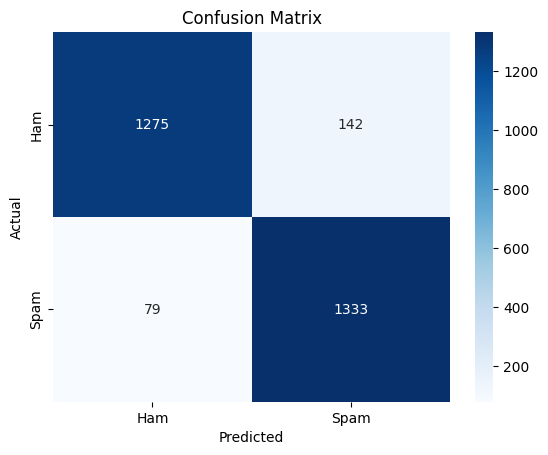

In [61]:
# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Logistic Regression Hyperparameter Tuning

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the hyperparameter grid
param_grid = {
    'C': [1, 10, 100],  # Regularization strength
    #'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization solvers
    #'class_weight': [None, 'balanced'],  # Class weights
    'max_iter': [100, 500, 1000],  # Maximum number of iterations
}

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    cv=3,
    verbose=True,  # Display progress
    n_jobs=-1  # Use all available CPU cores
)


In [32]:
# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")


Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1223, 

Best Parameters: {'C': 10, 'max_iter': 500}
Best Cross-Validation Accuracy: 0.9634


In [33]:
# Evaluate the best model on the test set
best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy after tuning: {accuracy:.4f}")

Logistic Regression Accuracy after tuning: 0.9659


In [34]:
# Generate and print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[9484  393]
 [ 283 9681]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      0.96      0.97      9877
        Spam       0.96      0.97      0.97      9964

    accuracy                           0.97     19841
   macro avg       0.97      0.97      0.97     19841
weighted avg       0.97      0.97      0.97     19841



Random Forest Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for split
    'class_weight': ['balanced', 'balanced_subsample'],  # Class weight
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    verbose=True,  # Display progress
    n_jobs=-1  # Use all available CPU cores
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calculate accuracy on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Set Accuracy: {accuracy_rf:.4f}")

# Generate and print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Neural Network Hyperparameter tuning

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],  # Different layer architectures
    'activation': ['tanh', 'relu'],  # Activation functions
    'solver': ['sgd', 'adam'],  # Solvers for optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate
    'max_iter': [200, 300]  # Number of iterations
}

# Initialize the MLP model
mlp_model = MLPClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=mlp_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    verbose=1,  # Display progress
    n_jobs=-1  # Use all available CPU cores
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_mlp_model = grid_search.best_estimator_
y_pred_mlp = best_mlp_model.predict(X_test)

# Calculate accuracy on the test set
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Test Set Accuracy: {accuracy_mlp:.4f}")

# Generate and print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))


Naives Bayes hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],  # Smoothing parameters
}

# Initialize the model
nb_model = MultinomialNB()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid,
    cv=3, 
    scoring='accuracy',  # Evaluate using accuracy
    verbose=1,  # Print progress
    n_jobs=-1  # Use all available CPU cores
)

In [28]:
# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the test set
best_nb_model = grid_search.best_estimator_
y_pred_nb = best_nb_model.predict(X_test)

# Calculate accuracy on the test set
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Test Set Accuracy: {accuracy_nb:.4f}")

# Generate and print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
8 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\naive_bayes.py", line 732, in fit
    X,

Best Parameters: {'alpha': 0.1}
Best Cross-Validation Accuracy: nan
Test Set Accuracy: 0.9313
Confusion Matrix:
[[9355  522]
 [ 842 9122]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.92      0.95      0.93      9877
        Spam       0.95      0.92      0.93      9964

    accuracy                           0.93     19841
   macro avg       0.93      0.93      0.93     19841
weighted avg       0.93      0.93      0.93     19841



Gradient Boost Hyperparameter tuning

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode 'Ham' -> 0, 'Spam' -> 1
y_test_encoded = label_encoder.transform(y_test)  # Encode test labels

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Maximum depth of trees
}

# Initialize the XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation for faster results
    scoring='accuracy',
    verbose=True,
    n_jobs=-1  # Use all available CPU cores
)


In [ ]:
# Perform the grid search with the encoded training labels
grid_search.fit(X_train, y_train_encoded)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [ ]:
# Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred_tuned = best_xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred_decoded = label_encoder.inverse_transform(y_pred_tuned)

# Test set evaluation
print("Tuned Gradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_decoded):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_decoded))
print("Classification Report:")
print(classification_report(y_test, y_pred_decoded))